# Downloading the dataset

In [1]:
# load data
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!unzip /content/drive/MyDrive/Mask3Cat.zip -d /content/drive/MyDrive

Archive:  /content/drive/MyDrive/Mask3Cat.zip
   creating: /content/drive/MyDrive/dataset/train/
   creating: /content/drive/MyDrive/dataset/train/mask/
  inflating: /content/drive/MyDrive/dataset/train/mask/mask (1).jpg  
  inflating: /content/drive/MyDrive/dataset/train/mask/mask (10).jpg  
  inflating: /content/drive/MyDrive/dataset/train/mask/mask (100).jpg  
  inflating: /content/drive/MyDrive/dataset/train/mask/mask (101).jpg  
  inflating: /content/drive/MyDrive/dataset/train/mask/mask (102).jpg  
  inflating: /content/drive/MyDrive/dataset/train/mask/mask (103).jpg  
  inflating: /content/drive/MyDrive/dataset/train/mask/mask (104).jpg  
  inflating: /content/drive/MyDrive/dataset/train/mask/mask (105).jpg  
  inflating: /content/drive/MyDrive/dataset/train/mask/mask (106).jpg  
  inflating: /content/drive/MyDrive/dataset/train/mask/mask (107).jpg  
  inflating: /content/drive/MyDrive/dataset/train/mask/mask (108).jpg  
  inflating: /content/drive/MyDrive/dataset/train/mask/mas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# loading the libraries

In [97]:
# import the necessary libraries
import os
import cv2
import keras
import numpy as np
import pandas as pd 
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from IPython.display import Image

# Train your own model with your own choice of parameters, and pretrained model 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16, VGG19, ResNet50, MobileNet, InceptionResNetV2
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,LeakyReLU

# Preparing the dataset

In [3]:
X_train = []
X_test = []
y_train = []
y_test = []

for folder in os.listdir("/content/drive/MyDrive/Mask3Cat/train"):
  for img_path in os.listdir("/content/drive/MyDrive/Mask3Cat/train/" + folder):
      image = cv2.imread(os.path.join("/content/drive/MyDrive/Mask3Cat/train/" + folder, img_path))
      resized = cv2.resize(image, (64, 64)) / 255
      X_train.append(resized)
      y_train.append(folder)

for folder in os.listdir("/content/drive/MyDrive/Mask3Cat/val"):
  for img_path in os.listdir("/content/drive/MyDrive/Mask3Cat/val/" + folder):
      image = cv2.imread(os.path.join("/content/drive/MyDrive/Mask3Cat/val/" + folder, img_path))
      resized = cv2.resize(image, (64, 64)) / 255
      X_test.append(resized)
      y_test.append(folder)

In [67]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [68]:
idx = np.random.permutation(len(X_train))
X_train, y_train = X_train[idx], y_train[idx]

idx = np.random.permutation(len(X_test))
X_test, y_test = X_test[idx], y_test[idx]

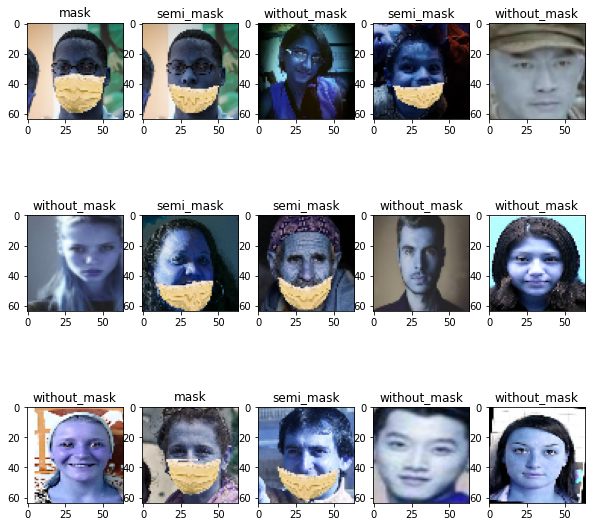

In [69]:
# plot random 5 images in your dataset with their labels
import random
names = random.choices(range(len(X_train)), k=15)
plt.figure(figsize = (10,10))
for n, name in enumerate(names):
  plt.subplot(3, 5, n+1)
  plt.title(y_train[name])
  plt.imshow(X_train[name])

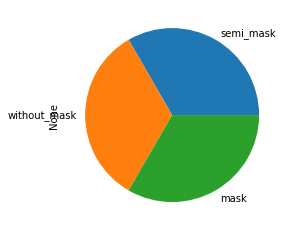

In [70]:
pd.Series(y_train).value_counts().plot(kind='pie')

In [71]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)

y_train_cat = to_categorical(y_train_le)
y_test_cat = to_categorical(y_test_le)

# Applying CNN

In [72]:
cnn_model = Sequential()
cnn_model.add(Conv2D(16, kernel_size=(3, 3),activation='linear',input_shape=(64,64,3),padding='same'))
cnn_model.add(MaxPooling2D((2, 2),padding='same'))
cnn_model.add(Conv2D(32, (3, 3), activation='linear',padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model.add(Flatten())
cnn_model.add(Dense(256, activation='linear'))                
cnn_model.add(Dense(3, activation='softmax'))
cnn_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_221 (Conv2D)         (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 32, 32, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_222 (Conv2D)         (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 8192)              0         
                                                                 
 dense_55 (Dense)            (None, 256)             

Epoch 1/10
270/270 [==============================] - 2s 5ms/step - loss: 0.3023 - accuracy: 0.9220 - val_loss: 0.0409 - val_accuracy: 0.9889
Epoch 2/10
270/270 [==============================] - 1s 4ms/step - loss: 0.0609 - accuracy: 0.9777 - val_loss: 0.5644 - val_accuracy: 0.8333
Epoch 3/10
270/270 [==============================] - 1s 4ms/step - loss: 0.0625 - accuracy: 0.9788 - val_loss: 0.0672 - val_accuracy: 0.9889
Epoch 4/10
270/270 [==============================] - 1s 4ms/step - loss: 0.0199 - accuracy: 0.9937 - val_loss: 0.0447 - val_accuracy: 0.9889
Epoch 5/10
270/270 [==============================] - 1s 4ms/step - loss: 0.0122 - accuracy: 0.9978 - val_loss: 0.0291 - val_accuracy: 0.9889
Epoch 6/10
270/270 [==============================] - 1s 4ms/step - loss: 0.0135 - accuracy: 0.9952 - val_loss: 0.1511 - val_accuracy: 0.9778
Epoch 7/10
270/270 [==============================] - 1s 4ms/step - loss: 0.0574 - accuracy: 0.9837 - val_loss: 0.0596 - val_accuracy: 0.9889
Epoch 

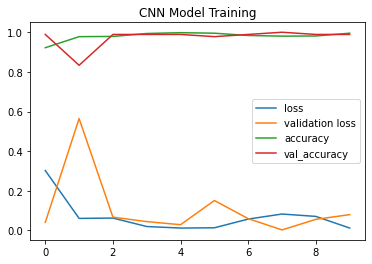

In [73]:
# Training the models
model_epochs = 10
cnn_history = cnn_model.fit(np.array(X_train),
                y_train_cat,
                epochs = model_epochs,
                validation_data=(np.array(X_test), y_test_cat),
                batch_size=10)

plt.plot(range(model_epochs),cnn_history.history['loss'], label = "loss")
plt.plot(range(model_epochs),cnn_history.history['val_loss'], label = "validation loss")
plt.plot(range(model_epochs),cnn_history.history['accuracy'], label = "accuracy")
plt.plot(range(model_epochs),cnn_history.history['val_accuracy'], label = "val_accuracy")
plt.title("CNN Model Training")
plt.legend()
plt.show()

# Transfer Learning

## VGG 16

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

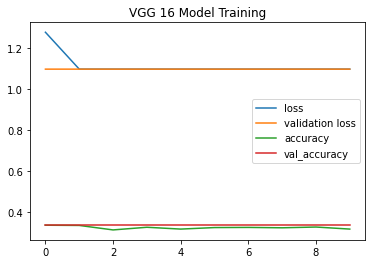

In [74]:
vgg16_model = VGG16(include_top=False,    input_shape=(64, 64, 3))

# Adding last layer into the vgg16 model
flat = Flatten()(vgg16_model.layers[-1].output)
classl = Dense(100, activation='relu')(flat)
class2 = Dense(10, activation='relu')(classl)
output = Dense(3, activation='softmax')(class2)
vgg16_model = Model(inputs=vgg16_model.inputs, outputs=output)
vgg16_model.compile(optimizer = 'adam',
                    loss = 'categorical_crossentropy',
                    metrics=['accuracy'])

vgg16_model.summary()

# Training the models
vgg16_history = vgg16_model.fit(np.array(X_train),
                y_train_cat,
                epochs = model_epochs,
                validation_data=(np.array(X_test), y_test_cat),
                batch_size=10)

plt.plot(range(model_epochs),vgg16_history.history['loss'], label = "loss")
plt.plot(range(model_epochs),vgg16_history.history['val_loss'], label = "validation loss")
plt.plot(range(model_epochs),vgg16_history.history['accuracy'], label = "accuracy")
plt.plot(range(model_epochs),vgg16_history.history['val_accuracy'], label = "val_accuracy")
plt.title("VGG 16 Model Training")
plt.legend()
plt.show()

## VGG 19

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

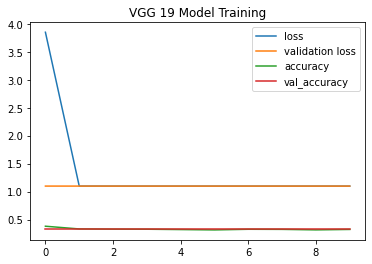

In [75]:
vgg19_model = VGG19(include_top=False,    input_shape=(64, 64, 3))

# Adding last layer into the vgg19 model
flat = Flatten()(vgg19_model.layers[-1].output)
classl = Dense(100, activation='relu')(flat)
class2 = Dense(10, activation='relu')(classl)
output = Dense(3, activation='softmax')(class2)
vgg19_model = Model(inputs=vgg19_model.inputs, outputs=output)
vgg19_model.compile(optimizer = 'adam',
                    loss = 'categorical_crossentropy',
                    metrics=['accuracy'])

vgg19_model.summary()

vgg19_history = vgg19_model.fit(np.array(X_train),
                y_train_cat,
                epochs = model_epochs,
                validation_data=(np.array(X_test), y_test_cat),
                batch_size=10)

plt.plot(range(model_epochs),vgg19_history.history['loss'], label = "loss")
plt.plot(range(model_epochs),vgg19_history.history['val_loss'], label = "validation loss")
plt.plot(range(model_epochs),vgg19_history.history['accuracy'], label = "accuracy")
plt.plot(range(model_epochs),vgg19_history.history['val_accuracy'], label = "val_accuracy")
plt.title("VGG 19 Model Training")
plt.legend()
plt.show()

## Inceptional Resnet v2

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d_836 (Conv2D)            (None, 37, 37, 32)   864         ['input_9[0][0]']                
                                                                                                  
 batch_normalization_812 (Batch  (None, 37, 37, 32)  96          ['conv2d_836[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_812 (Activation)    (None, 37, 37, 32)   0           ['batch_normalization_812[0

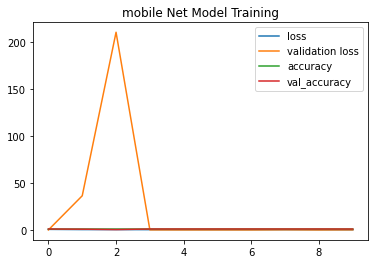

In [100]:
inception_resnet = InceptionResNetV2(include_top=False, input_shape=(75, 75, 3))

# Adding last layer into the vgg16 model
flat = Flatten()(inception_resnet.layers[-1].output)
classl = Dense(100, activation='relu')(flat)
classl = Dropout(0.8)(classl)
class2 = Dense(10, activation='relu')(classl)
output = Dense(3, activation='softmax')(class2)

inception_resnet = Model(inputs=inception_resnet.inputs, outputs=output)
inception_resnet.compile(optimizer = 'adam',
                    loss = 'categorical_crossentropy',
                    metrics=['accuracy'])

inception_resnet.summary()

X_train_inc = [cv2.resize(i, (75,75)) for i in X_train]
X_test_inc = [cv2.resize(i, (75,75))  for i in X_test]

# Training the models
inception_resnet_history = inception_resnet.fit(np.array(X_train_inc),
                y_train_cat,
                epochs = model_epochs,
                validation_data=(np.array(X_test_inc), y_test_cat),
                batch_size=10)

plt.plot(range(model_epochs),inception_resnet_history.history['loss'], label = "loss")
plt.plot(range(model_epochs),inception_resnet_history.history['val_loss'], label = "validation loss")
plt.plot(range(model_epochs),inception_resnet_history.history['accuracy'], label = "accuracy")
plt.plot(range(model_epochs),inception_resnet_history.history['val_accuracy'], label = "val_accuracy")
plt.title("mobile Net Model Training")
plt.legend()
plt.show()

# ANN Classifier

In [77]:
X_train_flatten = np.array([i.flatten() for i in X_train])
X_test_flatten = np.array([i.flatten() for i in X_test])

In [34]:
print("train data shape:" ,X_train_flatten.shape)
print("test data shape:", X_test_flatten.shape)

train data shape: (2694, 12288)
test data shape: (90, 12288)


In [56]:
ann = Sequential()

ann.add(Dense(32, 'relu',input_dim=X_train_flatten.shape[1]))
ann.add(Dense(3, activation='softmax'))

ann.compile(optimizer = 'adam',
                 loss = 'categorical_crossentropy',
                 metrics=['accuracy'])

ann.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 32)                393248    
                                                                 
 dense_49 (Dense)            (None, 3)                 99        
                                                                 
Total params: 393,347
Trainable params: 393,347
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
270/270 [==============================] - 1s 4ms/step - loss: 0.5217 - accuracy: 0.8263 - val_loss: 0.1564 - val_accuracy: 0.9667
Epoch 2/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2864 - accuracy: 0.8990 - val_loss: 0.0708 - val_accuracy: 0.9889
Epoch 3/10
270/270 [==============================] - 1s 3ms/step - loss: 0.1730 - accuracy: 0.9362 - val_loss: 0.1197 - val_accuracy: 0.9444
Epoch 4/10
270/270 [==============================] - 1s 3ms/step - loss: 0.0974 - accuracy: 0.9655 - val_loss: 0.0629 - val_accuracy: 0.9667
Epoch 5/10
270/270 [==============================] - 1s 3ms/step - loss: 0.1133 - accuracy: 0.9592 - val_loss: 0.0477 - val_accuracy: 0.9778
Epoch 6/10
270/270 [==============================] - 1s 3ms/step - loss: 0.0731 - accuracy: 0.9729 - val_loss: 0.4074 - val_accuracy: 0.8667
Epoch 7/10
270/270 [==============================] - 1s 3ms/step - loss: 0.0793 - accuracy: 0.9729 - val_loss: 0.0208 - val_accuracy: 1.0000
Epoch 

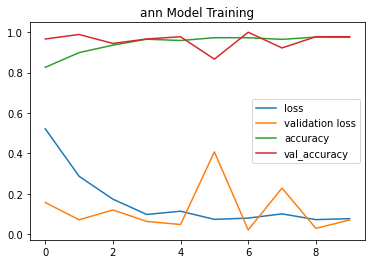

In [57]:
ann_history =  ann.fit(X_train_flatten, y_train_cat,
                epochs = model_epochs,
                validation_data=(X_test_flatten, y_test_cat),
                batch_size=10)

plt.plot(range(model_epochs),ann_history.history['loss'], label = "loss")
plt.plot(range(model_epochs),ann_history.history['val_loss'], label = "validation loss")
plt.plot(range(model_epochs),ann_history.history['accuracy'], label = "accuracy")
plt.plot(range(model_epochs),ann_history.history['val_accuracy'], label = "val_accuracy")
plt.title("ann Model Training")
plt.legend()
plt.show()

# CNN + MLP

In [90]:
# The CNN
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),activation='linear',input_shape=(64,64,3),padding='same'))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(32, (3, 3), activation='linear',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())

# The MLP 
model.add(Dense(64, activation='linear'))             
model.add(Dense(8, 'relu'))  
model.add(Dense(3, activation='softmax'))

model.compile(optimizer = 'adam',
                 loss = 'categorical_crossentropy',
                 metrics=['accuracy'])

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_428 (Conv2D)         (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 32, 32, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_429 (Conv2D)         (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 flatten_17 (Flatten)        (None, 8192)              0         
                                                                 
 dense_69 (Dense)            (None, 64)              

Epoch 1/10
270/270 [==============================] - 2s 4ms/step - loss: 0.3414 - accuracy: 0.8415 - val_loss: 0.0505 - val_accuracy: 0.9667
Epoch 2/10
270/270 [==============================] - 1s 4ms/step - loss: 0.0687 - accuracy: 0.9785 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 3/10
270/270 [==============================] - 1s 4ms/step - loss: 0.0517 - accuracy: 0.9818 - val_loss: 0.0376 - val_accuracy: 0.9889
Epoch 4/10
270/270 [==============================] - 1s 4ms/step - loss: 0.0243 - accuracy: 0.9918 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 5/10
270/270 [==============================] - 1s 4ms/step - loss: 0.0209 - accuracy: 0.9948 - val_loss: 8.5455e-04 - val_accuracy: 1.0000
Epoch 6/10
270/270 [==============================] - 1s 4ms/step - loss: 0.0090 - accuracy: 0.9967 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 7/10
270/270 [==============================] - 1s 4ms/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 1.7316e-04 - val_accuracy: 1.000

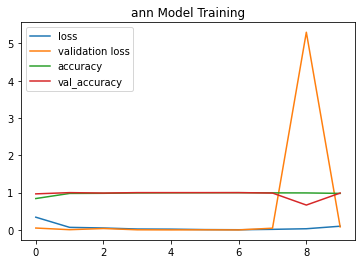

In [91]:
cnn_mlp_history =  model.fit(X_train, y_train_cat,
                    epochs = model_epochs,
                    validation_data=(X_test, y_test_cat),
                    batch_size=10)

plt.plot(range(model_epochs),cnn_mlp_history.history['loss'], label = "loss")
plt.plot(range(model_epochs),cnn_mlp_history.history['val_loss'], label = "validation loss")
plt.plot(range(model_epochs),cnn_mlp_history.history['accuracy'], label = "accuracy")
plt.plot(range(model_epochs),cnn_mlp_history.history['val_accuracy'], label = "val_accuracy")
plt.title("ann Model Training")
plt.legend()
plt.show()

# Models Comparisons

In [101]:
# For Model Evaluation
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score

# function for evaluation metrics precision, recall, f1 etc
def modelEvaluation(predictions, y_test_set, model_name):
    # Print model evaluation to predicted result    
    print("==========",model_name,"==========")
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))    
    print ("\nClassification report : \n", classification_report(y_test_set, predictions))
    print ("\nConfusion Matrix : \n", confusion_matrix(y_test_set, predictions))
    plt.figure(figsize=(10,10))
    sns.heatmap(confusion_matrix(y_test_set, predictions),annot=True, fmt='g',cmap='viridis')
    plt.tight_layout()
    plt.show()
    results = [accuracy_score(y_test_set, predictions), precision_score(y_test_set, predictions, average='macro'),
              recall_score(y_test_set, predictions, average='macro'),f1_score(y_test_set, predictions, average='macro')]
    return results

========== VGG-16 ==========

Accuracy on validation set: 0.3333

Classification report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.33      1.00      0.50        30
           2       0.00      0.00      0.00        30

    accuracy                           0.33        90
   macro avg       0.11      0.33      0.17        90
weighted avg       0.11      0.33      0.17        90


Confusion Matrix : 
 [[ 0 30  0]
 [ 0 30  0]
 [ 0 30  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


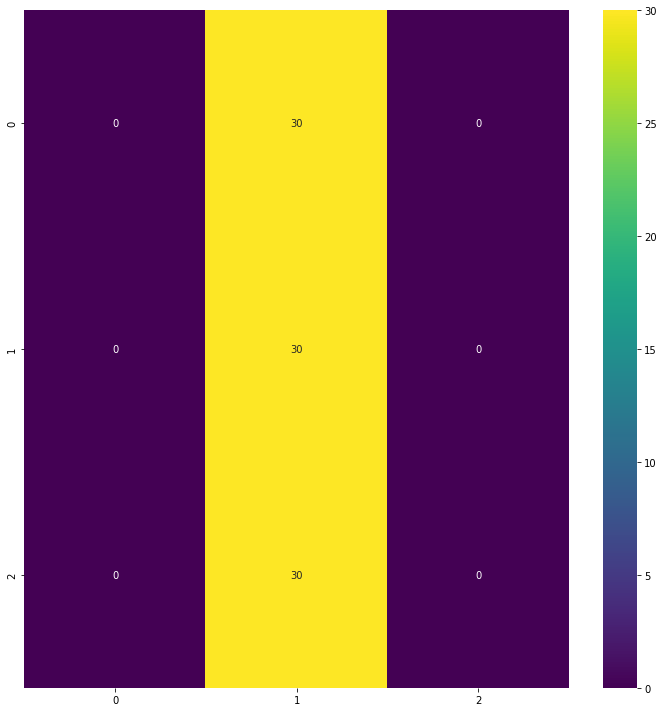

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: 

========== VGG-19 ==========

Accuracy on validation set: 0.3333

Classification report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.33      1.00      0.50        30
           2       0.00      0.00      0.00        30

    accuracy                           0.33        90
   macro avg       0.11      0.33      0.17        90
weighted avg       0.11      0.33      0.17        90


Confusion Matrix : 
 [[ 0 30  0]
 [ 0 30  0]
 [ 0 30  0]]


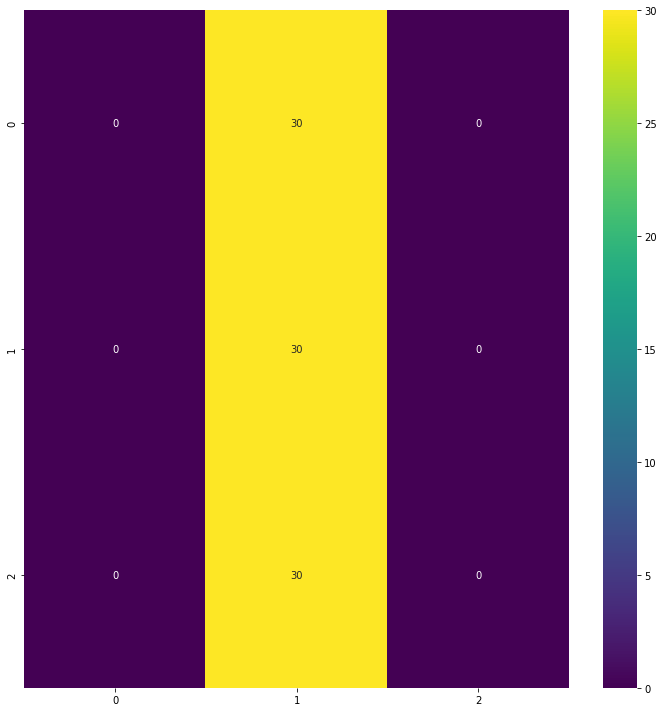

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========== inception resnet ==========

Accuracy on validation set: 0.9556

Classification report : 
               precision    recall  f1-score   support

           0       0.88      1.00      0.94        30
           1       1.00      0.87      0.93        30
           2       1.00      1.00      1.00        30

    accuracy                           0.96        90
   macro avg       0.96      0.96      0.96        90
weighted avg       0.96      0.96      0.96        90


Confusion Matrix : 
 [[30  0  0]
 [ 4 26  0]
 [ 0  0 30]]


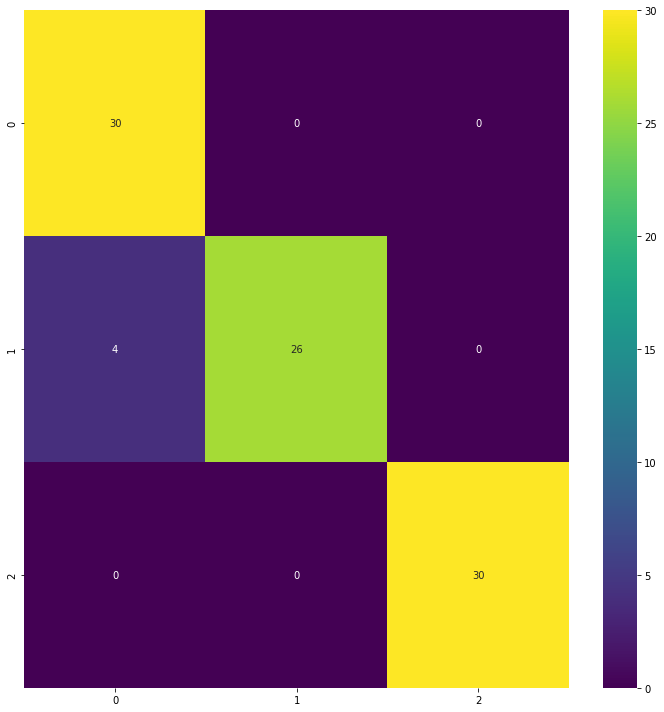

========== CNN Model ==========

Accuracy on validation set: 0.9889

Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      0.97      0.98        30
           2       0.97      1.00      0.98        30

    accuracy                           0.99        90
   macro avg       0.99      0.99      0.99        90
weighted avg       0.99      0.99      0.99        90


Confusion Matrix : 
 [[30  0  0]
 [ 0 29  1]
 [ 0  0 30]]


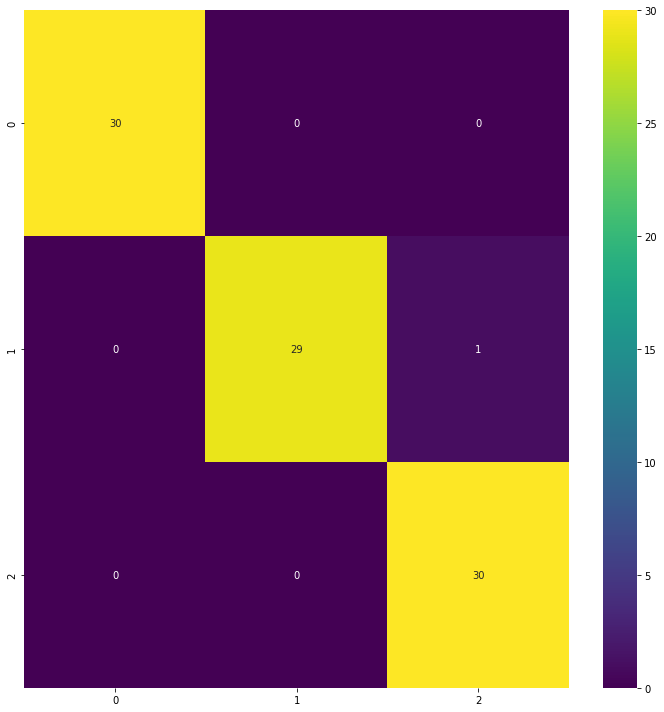

========== ANN ==========

Accuracy on validation set: 0.9778

Classification report : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.93      0.97        30
           2       0.97      1.00      0.98        30

    accuracy                           0.98        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90


Confusion Matrix : 
 [[30  0  0]
 [ 1 28  1]
 [ 0  0 30]]


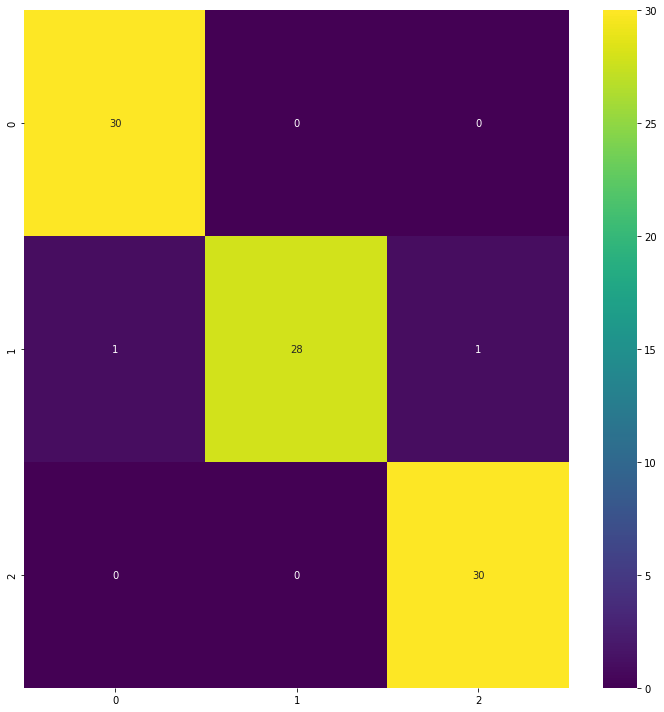

========== CNN + MLP ==========

Accuracy on validation set: 0.9889

Classification report : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.97      0.98        30
           2       1.00      1.00      1.00        30

    accuracy                           0.99        90
   macro avg       0.99      0.99      0.99        90
weighted avg       0.99      0.99      0.99        90


Confusion Matrix : 
 [[30  0  0]
 [ 1 29  0]
 [ 0  0 30]]


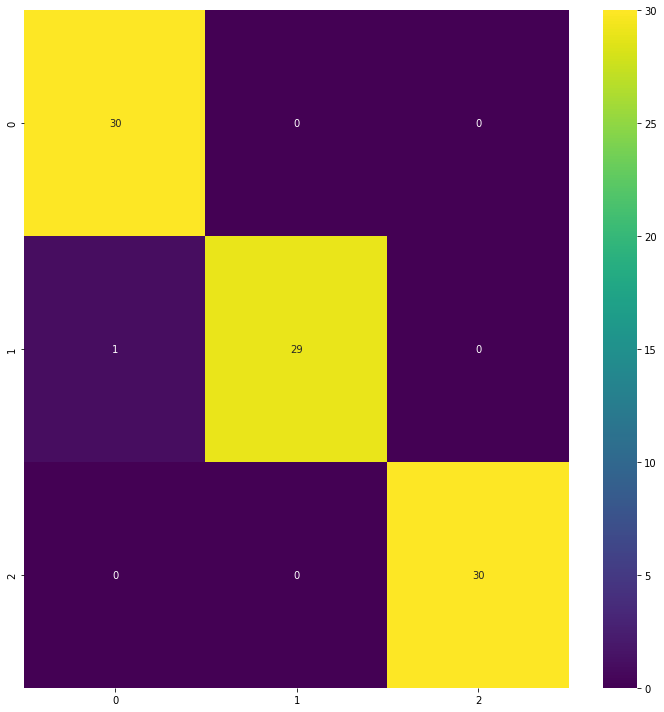

In [102]:
predictions = [np.argmax(i) for i in vgg16_model.predict(np.array(X_test))]
y_actual = [np.argmax(i) for i in y_test_cat]
vgg16_result = modelEvaluation(predictions, y_actual, "VGG-16")

predictions = [np.argmax(i) for i in vgg19_model.predict(np.array(X_test))]
y_actual = [np.argmax(i) for i in y_test_cat]
vgg19_result = modelEvaluation(predictions, y_actual, "VGG-19")

predictions = [np.argmax(i) for i in inception_resnet.predict(np.array(X_test_inc))]
y_actual = [np.argmax(i) for i in y_test_cat]
inception_result = modelEvaluation(predictions, y_actual, "inception resnet")

predictions = [np.argmax(i) for i in cnn_model.predict(np.array(X_test))]
y_actual = [np.argmax(i) for i in y_test_cat]
CNN_result = modelEvaluation(predictions, y_actual, "CNN Model")

predictions = [np.argmax(i) for i in ann.predict(X_test_flatten)]
y_actual = [np.argmax(i) for i in y_test_cat]
ann_result = modelEvaluation(predictions, y_actual, "ANN")

predictions = [np.argmax(i) for i in model.predict(X_test)]
y_actual = [np.argmax(i) for i in y_test_cat]
cnn_mlp_result = modelEvaluation(predictions, y_actual, "CNN + MLP")

In [103]:
from tabulate import tabulate
# showing all models result
dic = {
    'Metrics':['accuracy','precision','recall','f1-score'],
    'CNN' : CNN_result,
    'VGG-16' : vgg16_result,
    'VGG-19' : vgg19_result,
    'Inception Mobile Net': inception_result,
    'ANN': ann_result,
    'CNN + MLP':cnn_mlp_result
    
}
metrics_df = pd.DataFrame(dic)

metrics_df = metrics_df.set_index('Metrics')
# displaying the DataFrame
print(tabulate(metrics_df, headers = 'keys', tablefmt = 'psql'))

+-----------+----------+----------+----------+------------------------+----------+-------------+
| Metrics   |      CNN |   VGG-16 |   VGG-19 |   Inception Mobile Net |      ANN |   CNN + MLP |
|-----------+----------+----------+----------+------------------------+----------+-------------|
| accuracy  | 0.988889 | 0.333333 | 0.333333 |               0.955556 | 0.977778 |    0.988889 |
| precision | 0.989247 | 0.111111 | 0.111111 |               0.960784 | 0.978495 |    0.989247 |
| recall    | 0.988889 | 0.333333 | 0.333333 |               0.955556 | 0.977778 |    0.988889 |
| f1-score  | 0.988886 | 0.166667 | 0.166667 |               0.955357 | 0.977577 |    0.988886 |
+-----------+----------+----------+----------+------------------------+----------+-------------+


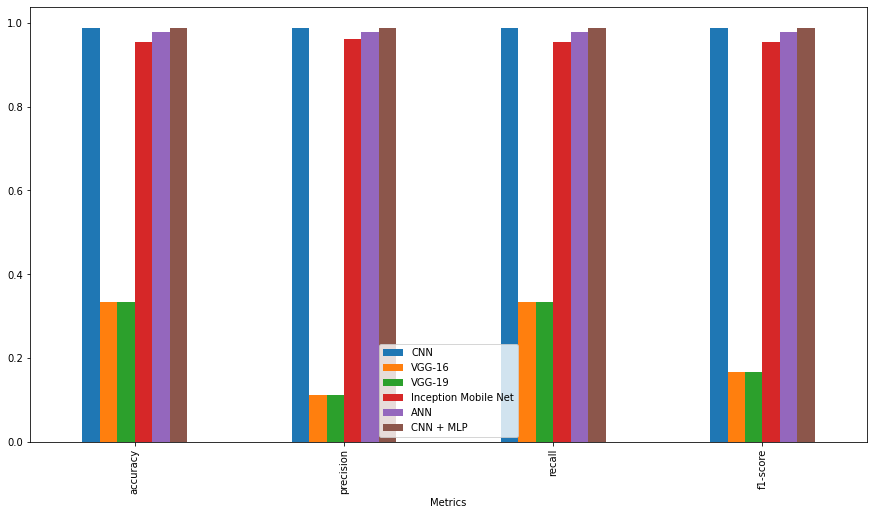

In [104]:
metrics_df.plot(kind='bar', figsize=(15,8))
plt.show()

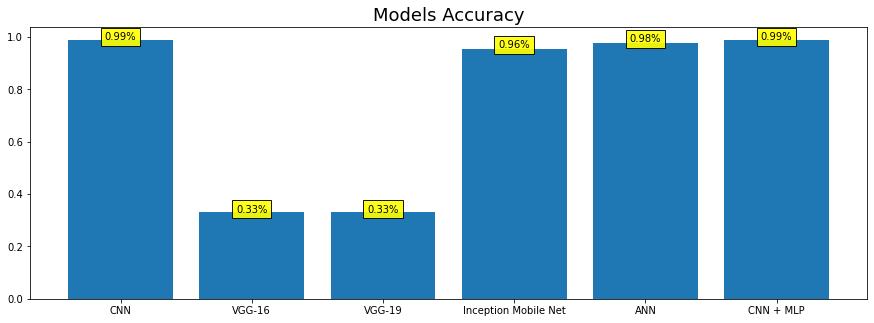

In [105]:
models_acc = metrics_df.iloc[0].tolist()
models_names = metrics_df.columns.tolist()
plt.figure(figsize=(15,5))
plt.bar(models_names,models_acc)
plt.title("Models Accuracy", fontsize=18)

def addLabels(names,acc):
    for i in range(len(names)):
        plt.text(i,round(acc[i],2),f"{round(acc[i],2)}%", ha = 'center', bbox=dict(facecolor='yellow', alpha=0.9))

addLabels(models_names,models_acc)
plt.show()